# Ensemble Learning

This is can be called the *The wisdom of the crowd* imagine if you get thousands of random people and get all their answers. If you look at their aggregated answer it is often better than a single expert answer. 

A group of predictors is called *ensemble* and this technique is called Ensemble Learning and the Ensemble Learning algorithm is called an Ensemble method. 

A example of the Ensemble method is when you get a group of Decision Trees classifiers and train them on a different random subset of the training data. Then each classifer will make a prediction then predict the class that gets the most votes wins.  This is called *Random Forest*. 

## Voting Classifiers

You can have several different classifiers with about 80% accuracy for example:

* Logistic Regression
* SVM classifier
* Random Forest classifier
* KNN classifer

<img src="images/ensemble_learning.png"> </img>

Above we see how each classifer is giving a prediction and we are getting a aggregate of predictions from each classifer than predict the class that gets the most votes. This means if 3 out of 4 classifers vote the instance is class A than class A will be predicted. 

This is a majority vote classifer or *hard voting classifier*. 

<img src="images/ensemble_hard_voting_classifer.png"></img>

You will often see that a voting classifier achieve a higher accuracy than the best classifier. Each classifer is a weak learner or only better than random guessing. The ensemble can still be a strong learner or achieving higher accuracy. This is true if there are sufficient number of weak leaners and are sufficiently diverse. This is because of the law of large numbers. 

Ensemble methods work best when the predicitors are independent from one another as possible. One way to get diverse classifiers is to train them using very different algoithms. This increases the chance that they will make very different types of errors, improving the ensemble's accuracy. 

In [1]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_moons

In [2]:
X, y = make_moons(n_samples=500, noise=0.30, random_state=42)
X_train, X_test, y_train, y_test= train_test_split(X,y,random_state=42)

In [3]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

In [4]:
log_clf = LogisticRegression(solver="lbfgs",random_state=42)
rnd_clf = RandomForestClassifier(n_estimators=100,random_state=42)
svm_clf = SVC(gamma="scale",random_state=42)

voting_clf = VotingClassifier(
             estimators=[('lr',log_clf),('rf',rnd_clf),('svc',svm_clf)],
             voting='hard')
voting_clf.fit(X_train,y_train)

VotingClassifier(estimators=[('lr',
                              LogisticRegression(C=1.0, class_weight=None,
                                                 dual=False, fit_intercept=True,
                                                 intercept_scaling=1,
                                                 l1_ratio=None, max_iter=100,
                                                 multi_class='auto',
                                                 n_jobs=None, penalty='l2',
                                                 random_state=42,
                                                 solver='lbfgs', tol=0.0001,
                                                 verbose=0, warm_start=False)),
                             ('rf',
                              RandomForestClassifier(bootstrap=True,
                                                     ccp_alpha=0.0,
                                                     class_weight=None,
                                               

In [5]:
from sklearn.metrics import accuracy_score

In [6]:
for clf in (log_clf,rnd_clf,svm_clf,voting_clf):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    print(clf.__class__.__name__,accuracy_score(y_test,y_pred))

LogisticRegression 0.864
RandomForestClassifier 0.896
SVC 0.896
VotingClassifier 0.912


What we did was create a ensemble and saw the output for each classifier. The voting classifier did perform the best. 

If all classifiers are able to estimate class probabilities then you can tell SciKit-Learn to predict the class with the highest class probability, averaged over all the individual classifiers. This is called *soft voting*, it is often better than hard voting because you give more weight to highly confident votes. 

You have the predict_prob() to help you determine probability for each classifier. 

In order to apply the different voting you need to pick in the the classifier "hard" or "soft". This is not the case for SVC here you need to set the *probability* param to TRUE. 

## Bagging and Pasting

*Bagging* is when you take the same training algorithm for every predictor and train them on different random subsets of the training set. 

This means every predictor is trained on a different sample of data. Samping performed with replacement is called *bagging* and when smapling is performed without replacement is called *pasting*. 

<img src="images/bagging_pasting.png"/></img>

In [7]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

In [8]:
bag_clf = BaggingClassifier(
        DecisionTreeClassifier(),n_estimators=500,
        max_samples=100, bootstrap=True, n_jobs=-1)
bag_clf.fit(X_train,y_train)
y_pred = bag_clf.predict(X_test)

In [9]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_pred))

0.904


In [10]:
tree_clf = DecisionTreeClassifier(random_state=42)
tree_clf.fit(X_train, y_train)
y_pred_tree = tree_clf.predict(X_test)
print(accuracy_score(y_test, y_pred_tree))

0.856


In [11]:
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [12]:
def plot_decision_boundary(clf, X, y, axes=[-1.5, 2.45, -1, 1.5], alpha=0.5, contour=True):
    x1s = np.linspace(axes[0], axes[1], 100)
    x2s = np.linspace(axes[2], axes[3], 100)
    x1, x2 = np.meshgrid(x1s, x2s)
    X_new = np.c_[x1.ravel(), x2.ravel()]
    y_pred = clf.predict(X_new).reshape(x1.shape)
    custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0'])
    plt.contourf(x1, x2, y_pred, alpha=0.3, cmap=custom_cmap)
    if contour:
        custom_cmap2 = ListedColormap(['#7d7d58','#4c4c7f','#507d50'])
        plt.contour(x1, x2, y_pred, cmap=custom_cmap2, alpha=0.8)
    plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo", alpha=alpha)
    plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs", alpha=alpha)
    plt.axis(axes)
    plt.xlabel(r"$x_1$", fontsize=18)
    plt.ylabel(r"$x_2$", fontsize=18, rotation=0)

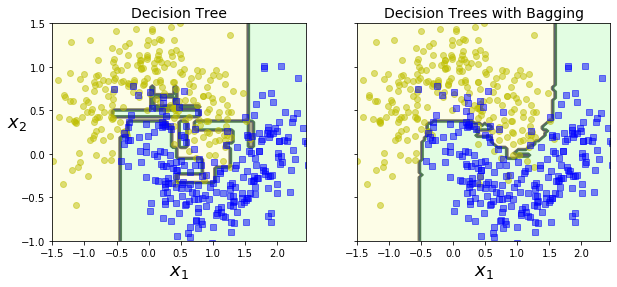

In [13]:
fix, axes = plt.subplots(ncols=2, figsize=(10,4), sharey=True)
plt.sca(axes[0])
plot_decision_boundary(tree_clf, X, y)
plt.title("Decision Tree", fontsize=14)
plt.sca(axes[1])
plot_decision_boundary(bag_clf, X, y)
plt.title("Decision Trees with Bagging", fontsize=14)
plt.ylabel("")
#save_fig("decision_tree_without_and_with_bagging_plot")
plt.show()

So we see that the Decision Trees are performing better with  Bagging than a single classifier. 

## Out of Bag evaluation

A BaggingClassifer with *m* samples training instances with replacement (bootstrap=True), the training set is size *m*. This means that only about 63% of the training instances are sampled on the average for each predictor. The left over 37% are called out of bag (oob) instances. 

Because the predictor never sees the oob instances then you can u se this to evaluate your model. This can be done with oob_score=True request oob evaluation after training. This gives you back a oob_score_. 

In [14]:
bag_clf = BaggingClassifier(
        DecisionTreeClassifier(random_state=42), n_estimators=500,
        bootstrap=True, oob_score=True, random_state=40)
bag_clf.fit(X_train,y_train)
bag_clf.oob_score_

0.9013333333333333

In [15]:
y_pred = bag_clf.predict(X_test)
accuracy_score(y_test,y_pred)

0.912

We see that oob score is very close to the accuracy score. We can also use the decision function to see how each instance performs.

In [16]:
bag_clf.oob_decision_function_

array([[0.31746032, 0.68253968],
       [0.34117647, 0.65882353],
       [1.        , 0.        ],
       [0.        , 1.        ],
       [0.        , 1.        ],
       [0.08379888, 0.91620112],
       [0.31693989, 0.68306011],
       [0.02923977, 0.97076023],
       [0.97687861, 0.02312139],
       [0.97765363, 0.02234637],
       [0.74404762, 0.25595238],
       [0.        , 1.        ],
       [0.71195652, 0.28804348],
       [0.83957219, 0.16042781],
       [0.97777778, 0.02222222],
       [0.0625    , 0.9375    ],
       [0.        , 1.        ],
       [0.97297297, 0.02702703],
       [0.95238095, 0.04761905],
       [1.        , 0.        ],
       [0.01704545, 0.98295455],
       [0.38947368, 0.61052632],
       [0.88700565, 0.11299435],
       [1.        , 0.        ],
       [0.96685083, 0.03314917],
       [0.        , 1.        ],
       [0.99428571, 0.00571429],
       [1.        , 0.        ],
       [0.        , 1.        ],
       [0.64804469, 0.35195531],
       [0.

## Random Patches and Random Subspaces

BaggingClassifier also supports smapling the features as well. Each predictor will train on a random subset of the input features rather than instance sampling. 

This is called *Random Patches* method were we sample features and also on instances.. This can be done by using the bootstrap paramter and the max_samples parameters. If you set boostrap=True and max_features=1.0 or smaller than this is Random Subspaces method. 

This will result in more predictor diversity where we are trading a bit more bias for a lower variance. 

## Random Forest

This is basically a ensemble of Decision Trees generally trained via the baggng method. Instead of using a Bagging Classifier or a DecisionTreeClassifier you can use a RandomForestClassifier classifier. The difference between using Bagging and DecisionTree classifier is that a RandomForestClassifier which is more conveniet and otimized for Decision Trees. 

In [17]:
#Example using RandomForest
from sklearn.ensemble import RandomForestClassifier

In [18]:
rnd_clf = RandomForestClassifier(n_estimators=500,max_leaf_nodes=16,n_jobs=-1) #n_jobs=-1 means we use all avaible CPUS
rnd_clf.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=16, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=500,
                       n_jobs=-1, oob_score=False, random_state=None, verbose=0,
                       warm_start=False)

In [19]:
y_pred_rf = rnd_clf.predict(X_test)

In [20]:
accuracy_score(y_test,y_pred_rf)

0.92

The random forest algorithm introduces extra randomness when growing trees it seaches for the best feature among a random subset fo features. This results in greater tree diversity which trades a higher bias for a lower variance, generally yielding an overall better model. 

## Feature Importance

Random Forests is that they make it easy to measure the relative importance of each feature. Scikit-Learn measures a features's importance by looking at how much the tree nodes that use that feature reduce impurity on average. It uses the weighted average where each node's weight is equal to the number of training samples that are associated with it. 

You can access the results using feature_importances_ variable. 

In [21]:
#Using the iris dataset to do
from sklearn.datasets import load_iris

In [22]:
iris = load_iris()
rnd_clf = RandomForestClassifier(n_estimators=500,random_state=42)
rnd_clf.fit(iris['data'], iris['target'])
for name, score in zip(iris['feature_names'],rnd_clf.feature_importances_):
    print(name,score)

sepal length (cm) 0.11249225099876375
sepal width (cm) 0.02311928828251033
petal length (cm) 0.4410304643639577
petal width (cm) 0.4233579963547682


In [23]:
rnd_clf.feature_importances_

array([0.11249225, 0.02311929, 0.44103046, 0.423358  ])

Above we can see that petal length was the most important feature in determining a target class. 

In [24]:
#Feature importance with mnist dataset
from sklearn.datasets import fetch_openml

In [25]:
mnist = fetch_openml('mnist_784',version=1)
mnist.target = mnist.target.astype(np.uint8)

In [26]:
rnd_clf = RandomForestClassifier(n_estimators=100,random_state=42)
rnd_clf.fit(mnist['data'],mnist['target'])

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [27]:
import matplotlib as mpl

In [28]:
def plot_digit(data):
    image = data.reshape(28,28)
    plt.imshow(image,cmap=mpl.cm.hot,
              interpolation="nearest")
    plt.axis("off")

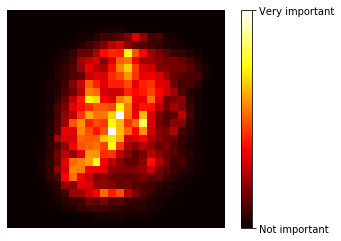

In [29]:
plot_digit(rnd_clf.feature_importances_)

cbar = plt.colorbar(ticks=[rnd_clf.feature_importances_.min(),rnd_clf.feature_importances_.max()])
cbar.ax.set_yticklabels(['Not important','Very important'])

#save_fig("mnist_feature_importance_plot")
plt.show()

## Boosting

Boosting is any Ensemble method that can combine several weak learners into a strong learner. The idea is to train predictors sequentially trying to correct its predecessor. 

One of the most popular boosting method is *Ada Boost*. 

## AdaBoost

Imagine for a new predictor to correct its predecessor is to pay  more attention to the training instances that the predecessor underfitted. This results in a new predictors focusing more and more on the hard cases this is what AdaBoost is. 

When training an AdaBoost classifier the AdaBost t rains the first base classifier (like a decision tree) and uses it to make predictions on the training dataset. The algorithm then increases the relative weight of misclassified training instances. Then it trains the second classifier(second tree) using the updated weights and again makes predictions on the training set, updates the instance weights and continues until the end. 

<img src="images/adaboost.png" /></img>

Th above im ages shows the decision boundaries fo five consectutive predictors on the dataset. The first classifier gets many instances wrong  but the second one does better. 

One challenge with this approach is that it cannot be paralleized since it will need the previous instance to be trained before it goes forward. 

In [30]:
#AdaBoost example
from sklearn.ensemble import AdaBoostClassifier

In [31]:
ada_clf = AdaBoostClassifier(
          DecisionTreeClassifier(max_depth=1), n_estimators=200,
          algorithm="SAMME.R",learning_rate=0.5, random_state=42)
ada_clf.fit(X_train,y_train)

AdaBoostClassifier(algorithm='SAMME.R',
                   base_estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                         class_weight=None,
                                                         criterion='gini',
                                                         max_depth=1,
                                                         max_features=None,
                                                         max_leaf_nodes=None,
                                                         min_impurity_decrease=0.0,
                                                         min_impurity_split=None,
                                                         min_samples_leaf=1,
                                                         min_samples_split=2,
                                                         min_weight_fraction_leaf=0.0,
                                                         presort='deprecated',
                          

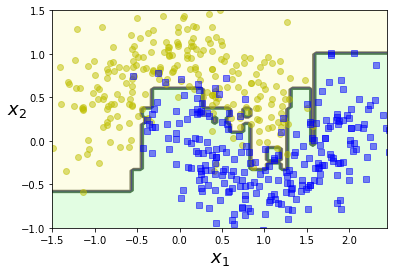

In [32]:
plot_decision_boundary(ada_clf,X,y)

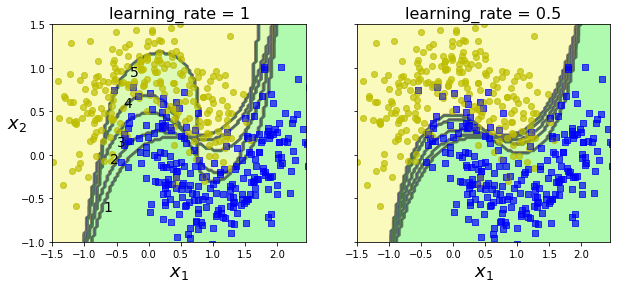

In [33]:
m = len(X_train)

fix, axes = plt.subplots(ncols=2, figsize=(10,4), sharey=True)
for subplot, learning_rate in ((0, 1), (1, 0.5)):
    sample_weights = np.ones(m)
    plt.sca(axes[subplot])
    for i in range(5):
        svm_clf = SVC(kernel="rbf", C=0.05, gamma="scale", random_state=42)
        svm_clf.fit(X_train, y_train, sample_weight=sample_weights)
        y_pred = svm_clf.predict(X_train)
        sample_weights[y_pred != y_train] *= (1 + learning_rate)
        plot_decision_boundary(svm_clf, X, y, alpha=0.2)
        plt.title("learning_rate = {}".format(learning_rate), fontsize=16)
    if subplot == 0:
        plt.text(-0.7, -0.65, "1", fontsize=14)
        plt.text(-0.6, -0.10, "2", fontsize=14)
        plt.text(-0.5,  0.10, "3", fontsize=14)
        plt.text(-0.4,  0.55, "4", fontsize=14)
        plt.text(-0.3,  0.90, "5", fontsize=14)
    else:
        plt.ylabel("")

#save_fig("boosting_plot")
plt.show()

The sequential learning technique on the right halfs the learning rate. This misclassifieds the instances weights are boosted half as much at every iteration. 

Sklearn has a multiclass version of AdaBoost called *SAMME* which is Stagewise Additive Modeling using Multiclass Expontential loss function. When there are two classes it using SAMME it will beh same as AdaBoost. 

Scikit-Learn can use SAMME.R when you need to estimate class probabilities again which relies on class probabilities rather than predictions and generally performs better. 

To improve your model using AdaBoost when overfitting is it use less estimators or a stronger reguliarized the base estimators. 

## Gradient Boosting

Another very popular boosting algorithm is *Gradient Boosting* it works by squentially adding predictors to an ensemble, each one correcting its predecessor. 

This method tries to fit the new predictor to the residual errorsmade by the previous predictor. 

Below we are going to do a example of Gradient Tree Boosting or Gradient Boosted Regression Trees. 

First we will train a DecisionTreeRegressor

In [34]:
#Gradient Boost example
from sklearn.tree import DecisionTreeRegressor

In [35]:
np.random.seed(42)
X = np.random.rand(100,1) - 0.5
y = 3*X[:,0]**2 + 0.05 * np.random.randn(100)

In [36]:
tree_reg1 = DecisionTreeRegressor(max_depth=2,random_state=42)
tree_reg1.fit(X,y)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=2,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=42, splitter='best')

In [37]:
y2 = y - tree_reg1.predict(X) #Residual errors from the previous model
tree_reg2 = DecisionTreeRegressor(max_depth=2,random_state=42)
tree_reg2.fit(X,y2)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=2,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=42, splitter='best')

In [38]:
y3 = y2 - tree_reg2.predict(X)
tree_reg3 = DecisionTreeRegressor(max_depth=2)
tree_reg3.fit(X,y3)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=2,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [39]:
X_new = np.array([[0.8]])

In [40]:
y_pred = sum(tree.predict(X_new) for tree in (tree_reg1, tree_reg2, tree_reg3))

In [41]:
y_pred

array([0.75026781])

In [42]:
def plot_predictions(regressors, X, y, axes, label=None, style="r-", data_style="b.", data_label=None):
    x1 = np.linspace(axes[0], axes[1], 500)
    y_pred = sum(regressor.predict(x1.reshape(-1, 1)) for regressor in regressors)
    plt.plot(X[:, 0], y, data_style, label=data_label)
    plt.plot(x1, y_pred, style, linewidth=2, label=label)
    if label or data_label:
        plt.legend(loc="upper center", fontsize=16)
    plt.axis(axes)

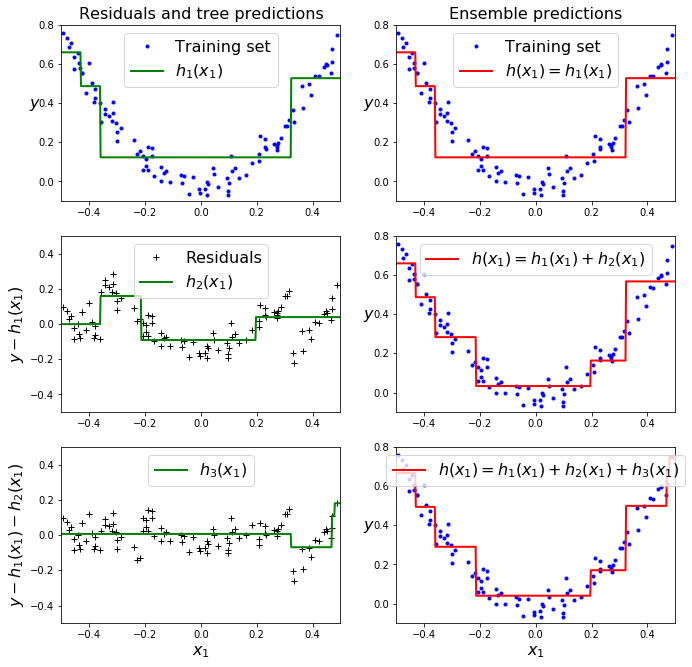

In [43]:
plt.figure(figsize=(11,11))

plt.subplot(321)
plot_predictions([tree_reg1], X, y, axes=[-0.5, 0.5, -0.1, 0.8], label="$h_1(x_1)$", style="g-", data_label="Training set")
plt.ylabel("$y$", fontsize=16, rotation=0)
plt.title("Residuals and tree predictions", fontsize=16)

plt.subplot(322)
plot_predictions([tree_reg1], X, y, axes=[-0.5, 0.5, -0.1, 0.8], label="$h(x_1) = h_1(x_1)$", data_label="Training set")
plt.ylabel("$y$", fontsize=16, rotation=0)
plt.title("Ensemble predictions", fontsize=16)

plt.subplot(323)
plot_predictions([tree_reg2], X, y2, axes=[-0.5, 0.5, -0.5, 0.5], label="$h_2(x_1)$", style="g-", data_style="k+", data_label="Residuals")
plt.ylabel("$y - h_1(x_1)$", fontsize=16)

plt.subplot(324)
plot_predictions([tree_reg1, tree_reg2], X, y, axes=[-0.5, 0.5, -0.1, 0.8], label="$h(x_1) = h_1(x_1) + h_2(x_1)$")
plt.ylabel("$y$", fontsize=16, rotation=0)

plt.subplot(325)
plot_predictions([tree_reg3], X, y3, axes=[-0.5, 0.5, -0.5, 0.5], label="$h_3(x_1)$", style="g-", data_style="k+")
plt.ylabel("$y - h_1(x_1) - h_2(x_1)$", fontsize=16)
plt.xlabel("$x_1$", fontsize=16)

plt.subplot(326)
plot_predictions([tree_reg1, tree_reg2, tree_reg3], X, y, axes=[-0.5, 0.5, -0.1, 0.8], label="$h(x_1) = h_1(x_1) + h_2(x_1) + h_3(x_1)$")
plt.xlabel("$x_1$", fontsize=16)
plt.ylabel("$y$", fontsize=16, rotation=0)

#save_fig("gradient_boosting_plot")
plt.show()

What we see above in the first graph is that we see the results are the same as the decision tree. 

The second graph does include the errors it learned from the first tree model and improved. 

And finally the third graph has the best predictions because it is taking what it learned from the 2nd and 3rd model. 

There is a simplier way to train the GBRT ensembles and that is to use Sklearn GradientBoostingRegressor. It has hyperparameters to controlt eh growth of Decision Trees as well to control the ensemble training such as the number trees. 

In [44]:
#Using GradientBoosting
from sklearn.ensemble import GradientBoostingRegressor

In [45]:
gbrt = GradientBoostingRegressor(max_depth=2,n_estimators=3, learning_rate=1.0)
gbrt.fit(X,y)

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=1.0, loss='ls', max_depth=2,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=3,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [46]:
gbrt_slow = GradientBoostingRegressor(max_depth=2,n_estimators=200,learning_rate=0.1,random_state=42)
gbrt_slow.fit(X,y)

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=2,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=200,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=42, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

With GradientBoosting if you sent a low learning_rate llike 0.l1 you will need more trees in the ensemble to fit the training set, but predictions will usually generalize better. This technique is called *Shrinkage*.

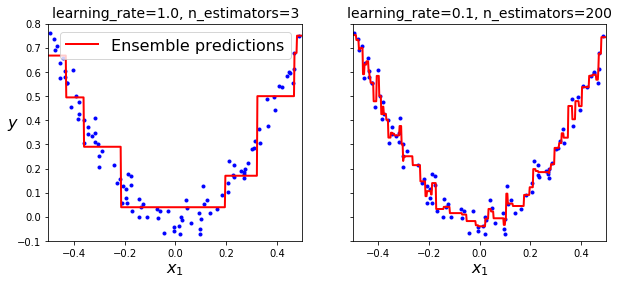

In [47]:
fix, axes = plt.subplots(ncols=2, figsize=(10,4), sharey=True)

plt.sca(axes[0])
plot_predictions([gbrt], X, y, axes=[-0.5, 0.5, -0.1, 0.8], label="Ensemble predictions")
plt.title("learning_rate={}, n_estimators={}".format(gbrt.learning_rate, gbrt.n_estimators), fontsize=14)
plt.xlabel("$x_1$", fontsize=16)
plt.ylabel("$y$", fontsize=16, rotation=0)

plt.sca(axes[1])
plot_predictions([gbrt_slow], X, y, axes=[-0.5, 0.5, -0.1, 0.8])
plt.title("learning_rate={}, n_estimators={}".format(gbrt_slow.learning_rate, gbrt_slow.n_estimators), fontsize=14)
plt.xlabel("$x_1$", fontsize=16)

#save_fig("gbrt_learning_rate_plot")
plt.show()

The one on the left has a higher learning rate so it does not generalize well but the one on the right does. However it looks like overfitting. What we want to do in this scenario is actually do some early stopping to get the right number of trees which looks to be in 3 to 200. 

There is a another option called staged_predict() method which iterators over the predictions made by the ensemble at each stage of training.

In [48]:
#example with staged_predict and early stopping
from sklearn.metrics import mean_squared_error

In [49]:
X_train, X_val, y_train, y_val = train_test_split(X,y,random_state=42)

gbrt = GradientBoostingRegressor(max_depth=2, n_estimators=120, random_state=42)
gbrt.fit(X_train,y_train)

errors = [mean_squared_error(y_val,y_pred) for y_pred in gbrt.staged_predict(X_val)]
bst_n_estimators = np.argmin(errors) + 1

gbrt_best = GradientBoostingRegressor(max_depth=2,n_estimators=bst_n_estimators,random_state=42)
gbrt_best.fit(X_train,y_train)

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=2,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=118,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=42, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

What we do with the above code is train a GBRT ensemble with 120 trees. At each iteration we measure the validation error to find the optimal number of tress then we train the final version of the model with those trees. 

In [50]:
min_error = np.min(errors)

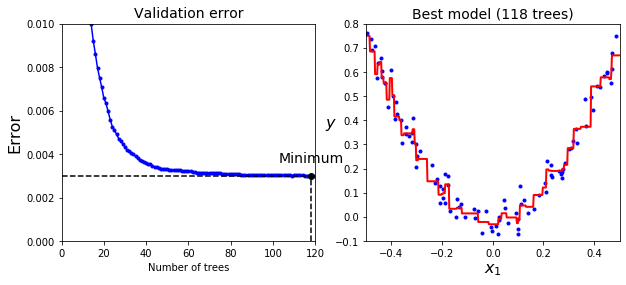

In [51]:
plt.figure(figsize=(10, 4))

plt.subplot(121)
plt.plot(errors, "b.-")
plt.plot([bst_n_estimators, bst_n_estimators], [0, min_error], "k--")
plt.plot([0, 120], [min_error, min_error], "k--")
plt.plot(bst_n_estimators, min_error, "ko")
plt.text(bst_n_estimators, min_error*1.2, "Minimum", ha="center", fontsize=14)
plt.axis([0, 120, 0, 0.01])
plt.xlabel("Number of trees")
plt.ylabel("Error", fontsize=16)
plt.title("Validation error", fontsize=14)

plt.subplot(122)
plot_predictions([gbrt_best], X, y, axes=[-0.5, 0.5, -0.1, 0.8])
plt.title("Best model (%d trees)" % bst_n_estimators, fontsize=14)
plt.ylabel("$y$", fontsize=16, rotation=0)
plt.xlabel("$x_1$", fontsize=16)

#save_fig("early_stopping_gbrt_plot")
plt.show()

You can also stop early so you do not need to train all possible number of trees  using the setting warm_start=True. This keeps existing trees when the fit() method is called allowing incremental training.

In [52]:
gbrt = GradientBoostingRegressor(max_depth=2, warm_start=True, random_state=42)

min_val_error = float("inf")
error_going_up = 0
for n_estimators in range(1, 120):
    gbrt.n_estimators = n_estimators
    gbrt.fit(X_train, y_train)
    y_pred = gbrt.predict(X_val)
    val_error = mean_squared_error(y_val, y_pred)
    if val_error < min_val_error:
        min_val_error = val_error
        error_going_up = 0
    else:
        error_going_up += 1
        if error_going_up == 5:
            break  # early stopping

In [53]:
gbrt.n_estimators

105

In [54]:
print("Minimum validation MSE:", min_val_error)

Minimum validation MSE: 0.003023701609089896


GBR  also s upports the subsample hyperparameter which specifies the fraction of training instances to be used for each tree during training. If you set subsample to 0.25 each tree is trained on 25% of the training instances selected randomly.  This is called Stochastic Gradient Boosting. 

This trades higher bias for a lower variance. 

## XGboost 

XGBoost or Extreme Gradient Boosting is a optimized implementation of Gradient Boosting. It is extremely fast, scalable and portable.

In [55]:
#Example XGBoost
try:
    import xgboost
    install_xgboost = False
except ImportError as ex:
    print("Error: the xgboost library is not installed.")
    xgboost = None
    install_xgboost = True

In [56]:
if install_xgboost:
    !pip install xgboost

In [57]:
if xgboost is not None:
    xgb_reg = xgboost.XGBRegressor(random_state=42)
    xgb_reg.fit(X_train,y_train)
    y_pred = xgb_reg.predict(X_val)
    val_error = mean_squared_error(y_val,y_pred)
    print("Validation MSE:", val_error)

Validation MSE: 0.0030701252830088776


In [58]:
if xgboost is not None:  # not shown in the book
    xgb_reg.fit(X_train, y_train,
                eval_set=[(X_val, y_val)], early_stopping_rounds=2)
    y_pred = xgb_reg.predict(X_val)
    val_error = mean_squared_error(y_val, y_pred)  # Not shown
    print("Validation MSE:", val_error)    

[0]	validation_0-rmse:0.19678
Will train until validation_0-rmse hasn't improved in 2 rounds.
[1]	validation_0-rmse:0.14325
[2]	validation_0-rmse:0.10835
[3]	validation_0-rmse:0.08482
[4]	validation_0-rmse:0.07044
[5]	validation_0-rmse:0.06255
[6]	validation_0-rmse:0.05927
[7]	validation_0-rmse:0.05698
[8]	validation_0-rmse:0.05519
[9]	validation_0-rmse:0.05513
[10]	validation_0-rmse:0.05473
[11]	validation_0-rmse:0.05463
[12]	validation_0-rmse:0.05427
[13]	validation_0-rmse:0.05376
[14]	validation_0-rmse:0.05377
[15]	validation_0-rmse:0.05363
[16]	validation_0-rmse:0.05358
[17]	validation_0-rmse:0.05387
[18]	validation_0-rmse:0.05386
Stopping. Best iteration:
[16]	validation_0-rmse:0.05358

Validation MSE: 0.002870651053050432


In [59]:
%timeit xgboost.XGBRegressor().fit(X_train, y_train) if xgboost is not None else None

26.9 ms ± 8.6 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


## Stacking

Stacking is when we train a model to aggreate all the predictions of all predictios in a ensemble. 

<img src="images/stacking.png" /></img>

What happens is that is that the predictors (decision trees, reidge regression etc) with a predictor of their own. And the make a final predictor which is a blender or meta mlearner and then it makes a final predictions. 

To train a predicator you normallly use a hold-out set. The training set is split into two subsets The first subset is used to train the predictors in the first layer. Next the first layer predicators are used to make predictions on the next layer. This ensures the predictions are "cleaned" since the predictor never say these instances during training. 

<img src="images/stacking_subsets.png" /></img>

# Excerises

1. If you have trained five different models on the exact same training data, and they all achieve 95% precision, is there any chance you can combine these to get better results If so, how if not why?

Yes there is a chance, because we will get a aggregate training score and not all the models made the same mistakes. Especially if all the models are different like a SVM and Logistic regression classifier. 

2. what is the difference between hard and soft voting classifiers?

Hard voting is when the it picks the class that got the most votes. Soft is when the the average estimated class probability for each class and picks the class with the highest probability. 

3. Is it possible to spe ed up training of a bagging ensemble by distributuing it across multiple servers? What about pasting ensembles, booosting ensembles, Random Forests or stacking ensembles?

Yes it is possible since it each predictor in the ensemble is indepent of the others. The same is true for pasting and Random Forests. The same is not truefor boosting beacuse each predictor in a boosting ensemble is built based on the previous predictor because the training is sequential. 

4. What is the benefit of out of bag evaluation?

It has a validation dataset ready to use.

5. What makes Extra-Trees more random than regular Random Forests? How can this extra randomness help? Are Extra-Trees slower or fasters than regular Random Forests?

They used random thresholds for each feature than searching for the best possible threshold. Also the extra randomness acts like regularization. However they are not faster or slower than a random forest. 

6. If your Adaboost ensembles underfits the training data, which hyperparameters whould you tweak and how?

You can increase the learning rate or the n_estimators. 

7. If your Gradient Boosting ensembles overfits the training set, should you increase or decrease the learning rate?

Decrease.

# 8.)
Load the MNIST data and split it into a training set, a validation set and a test set. Then train various classifiers such as Random Forest classifier, Extra Trees classifier and SVM classifer. Next try to fit them in a ensemble that outperforms each individual classifer on the validation data using soft or hard voting. 

Once you found one try it on the test set. Does it perform better than the individual classifier

In [60]:
#import MNIST data
from sklearn.datasets import fetch_openml

In [61]:
#Create variables for MNIST Data
mnist = fetch_openml('mnist_784',version=1)
mnist.target = mnist.target.astype(np.uint8)

In [62]:
#import train test split
from sklearn.model_selection import train_test_split

In [63]:
X = mnist['data']
y = mnist.target

In [64]:
#Create training data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=10000, random_state=42)

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=10000, random_state=42)

In [65]:
#Build Random Forest
from sklearn.ensemble import RandomForestClassifier

In [66]:
#import uniform
from scipy.stats import uniform

In [67]:
#Random Search just because it is faster
from sklearn.model_selection import RandomizedSearchCV

In [68]:
random_forest_model = RandomForestClassifier(n_estimators=10,max_depth=2,min_samples_split=2)

#Distribution 
distributions = dict(n_estimators=list(range(0,15)),max_depth=[1,3,5,7],min_samples_split=[2,4])

#Random Search
random_clf = RandomizedSearchCV(random_forest_model,distributions,random_state=42)

In [69]:
#Random Search train
random_clf.fit(X_train,y_train)

RandomizedSearchCV(cv=None, error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=2,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
               

In [70]:
random_clf.best_params_

{'n_estimators': 13, 'min_samples_split': 2, 'max_depth': 5}

In [71]:
random_pred = random_clf.best_estimator_.predict(X_test)

In [72]:
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix

In [73]:
random_accuracy = accuracy_score(y_test,random_pred)
random_f1score = f1_score(y_test,random_pred,average="weighted")
#random_cm = confusion_matrix(y_test,random_pred)

print("The accuracy is {0}\nThe f1 score {1}\n".format(random_accuracy,random_f1score))

The accuracy is 0.8191
The f1 score 0.8173466023854163



In [74]:
from sklearn.ensemble import ExtraTreesClassifier

In [75]:
extra_trees_model = ExtraTreesClassifier(n_estimators=10,max_depth=2,min_samples_split=2)

#Distribution 
distributions = dict(n_estimators=list(range(0,15)),max_depth=[1,3,5,7],min_samples_split=[2,4])

#Random Search
extra_trees_clf = RandomizedSearchCV(extra_trees_model,distributions,random_state=42)

In [76]:
extra_trees_clf.fit(X_train,y_train)

RandomizedSearchCV(cv=None, error_score=nan,
                   estimator=ExtraTreesClassifier(bootstrap=False,
                                                  ccp_alpha=0.0,
                                                  class_weight=None,
                                                  criterion='gini', max_depth=2,
                                                  max_features='auto',
                                                  max_leaf_nodes=None,
                                                  max_samples=None,
                                                  min_impurity_decrease=0.0,
                                                  min_impurity_split=None,
                                                  min_samples_leaf=1,
                                                  min_samples_split=2,
                                                  min_weight_fraction_leaf=0.0,
                                                  n_estimators=10, n_jobs=None,
          

In [77]:
extra_trees_clf.best_params_

{'n_estimators': 13, 'min_samples_split': 2, 'max_depth': 5}

In [78]:
extra_trees_pred = extra_trees_clf.best_estimator_.predict(X_test)

In [79]:
extra_trees_accuracy = accuracy_score(y_test,extra_trees_pred)
extra_trees_f1score = f1_score(y_test,extra_trees_pred,average="weighted")
#random_cm = confusion_matrix(y_test,random_pred)

print("The accuracy is {0}\nThe f1 score {1}\n".format(extra_trees_accuracy,extra_trees_f1score))

The accuracy is 0.7846
The f1 score 0.7782546292962436



In [80]:
from sklearn.svm import LinearSVC

In [81]:
#SVC_model = LinearSVC(C=1.0)

#Distribution 
#distributions = dict(C=range(1,3))

#Random Search
#svc_clf = RandomizedSearchCV(SVC_model,distributions,random_state=42)

In [82]:
#svc_clf.fit(X_train,y_train)
#SVC_model.fit(X_train,y_train)

In [83]:
from sklearn.ensemble import VotingClassifier

In [84]:
voting_clf = VotingClassifier(
             estimators=[('extrat_trees',extra_trees_clf),('random_forest',random_clf)],
             voting='hard')
voting_clf.fit(X_train,y_train)

VotingClassifier(estimators=[('extrat_trees',
                              RandomizedSearchCV(cv=None, error_score=nan,
                                                 estimator=ExtraTreesClassifier(bootstrap=False,
                                                                                ccp_alpha=0.0,
                                                                                class_weight=None,
                                                                                criterion='gini',
                                                                                max_depth=2,
                                                                                max_features='auto',
                                                                                max_leaf_nodes=None,
                                                                                max_samples=None,
                                                                                min_impurity_decr

In [85]:
voting_pred = voting_clf.predict(X_test)

In [86]:
voting_accuracy = accuracy_score(y_test,voting_pred)
voting_f1score = f1_score(y_test,voting_pred,average="weighted")
#random_cm = confusion_matrix(y_test,random_pred)

print("The accuracy is {0}\nThe f1 score {1}\n".format(voting_accuracy,voting_f1score))

The accuracy is 0.7867
The f1 score 0.7810252826841658



In [87]:
#All results 
print("Random Accuracy {0}\nRandom F1 {1}\nTrees Accuracy {2}\nTrees F1 {3}\nVoting Accuracy {4}\nVoting F1 {5}\n".format(random_accuracy,random_f1score,extra_trees_accuracy,extra_trees_f1score,voting_accuracy,voting_f1score))

Random Accuracy 0.8191
Random F1 0.8173466023854163
Trees Accuracy 0.7846
Trees F1 0.7782546292962436
Voting Accuracy 0.7867
Voting F1 0.7810252826841658



In [88]:
voting_clf.voting = "soft"

In [89]:
soft_voting_pred = voting_clf.predict(X_test)

In [90]:
soft_voting_accuracy = accuracy_score(y_test,soft_voting_pred)
soft_voting_f1score = f1_score(y_test,soft_voting_pred,average="weighted")
#random_cm = confusion_matrix(y_test,random_pred)

print("The accuracy is {0}\nThe f1 score {1}\n".format(soft_voting_accuracy,soft_voting_f1score))

The accuracy is 0.842
The f1 score 0.8400889899326006



Soft voting does better.

# 9.)

Run the individual classifiers from the previous exercise to make predictions on the validation set, and create a new training set with the resulting predictions: each training instance is a vector containing the set of predictions from all your classifiers for an image, and the target is the image's class. Train a classifier on this new training set.

In [91]:
#Create a list of the estimators 
estimators = [random_clf,extra_trees_clf,voting_clf]

In [92]:
X_val_predictions = np.empty((len(X_val), len(estimators)), dtype=np.float32) #createa  empty list length of val

for index, estimator in enumerate(estimators):
    X_val_predictions[:, index] = estimator.predict(X_val)

In [93]:
X_val_predictions

array([[5., 9., 5.],
       [3., 3., 8.],
       [1., 1., 1.],
       ...,
       [7., 7., 7.],
       [6., 6., 6.],
       [7., 7., 7.]], dtype=float32)

In [96]:
rnd_forest_blender = RandomForestClassifier(n_estimators=200, oob_score=True, random_state=42)
rnd_forest_blender.fit(X_val_predictions, y_val)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=True, random_state=42, verbose=0,
                       warm_start=False)

What I did above is each predicted value serves as a training feature. So if my random_clf predicted 5 it is now a feature for the model. And if my extra trees predicted 9 it is also a feature for the model. And if the voting classifer predicted 5 it is feature for the model. This is way  my model is learning from the previous predcitions.

In [97]:
rnd_forest_blender.oob_score_

0.8494

In [98]:
#Making predictions
X_test_predictions = np.empty((len(X_test), len(estimators)), dtype=np.float32)

for index, estimator in enumerate(estimators):
    X_test_predictions[:, index] = estimator.predict(X_test)

In [99]:
X_test_predictions

array([[8., 8., 8.],
       [9., 4., 4.],
       [6., 5., 5.],
       ...,
       [3., 2., 3.],
       [3., 3., 3.],
       [3., 3., 3.]], dtype=float32)

In [101]:
blender_pred = rnd_forest_blender.predict(X_test_predictions)

In [103]:
blender_accuracy = accuracy_score(y_test,blender_pred)
blender_f1score = f1_score(y_test,blender_pred,average="weighted")
#random_cm = confusion_matrix(y_test,random_pred)

print("The accuracy is {0}\nThe f1 score {1}\n".format(blender_accuracy,blender_f1score))

The accuracy is 0.8526
The f1 score 0.8517181135204146



The blender solution performs the best out of all possible solutions